# Heart Attack Predict Model

In [1]:
# importing libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Step 01: Data Exploration

In [2]:
# Step 01 - Data Exploration: 
df = pd.read_csv('heart.csv')
df

# Legend of the Dataframe columns:
# 1. age: Age of the person
# 2. sex: Gender of the person
# 3. cp: Chest Pain type
# 4. trtbps: resting blood pressure (in mm Hg)
# 5. chol: cholestoral in mg/dl fetched via BMI sensor
# 6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 7. restecg: resting electrocardiographic results
# 8. thalachh: maximum heart rate achieved
# 9. exng: exercise induced angina (1 = yes; 0 = no)
# 10. oldpeak: Previous peak
# 11. slp: Slope
# 12. caa: number of major vessels (0-3)
# 13. thall: Thal rate
# 14. output: Target variable (0= less chance of heart attack 1= more chance of heart attack)



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


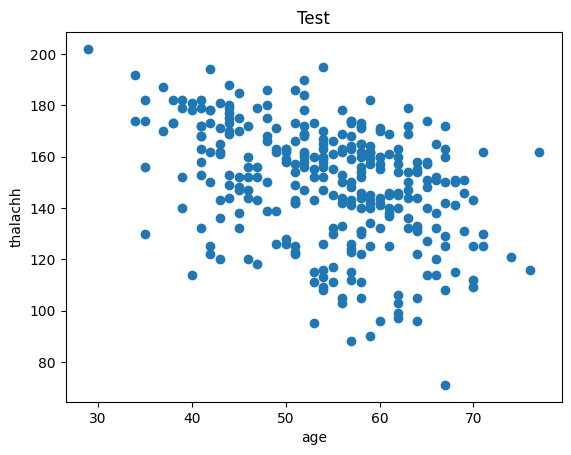

In [4]:
# Scatter plot: 
x = df['age']
y = df['thalachh']
plt.scatter(x, y, label='Text')
plt.title('Test')
plt.xlabel('age')
plt.ylabel('thalachh')
plt.show()

In [5]:
# Sorting the dataframe by age:
df = df.sort_values(by=['age'])
df = df.reset_index(drop=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
299,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
300,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
301,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


# Step 02: Data Preprocessing

In [6]:
# Step 02: Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Remove all columns that have any empty cells, and saves it in the same dataframe
df.dropna(axis=1, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. Based on the above 'df.info()', it is clear that there is no missing values in all 14 columns.
2. All categorical variables are already encoded. For example:

    2.1 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    2.2 exng: exercise induced angina (1 = yes; 0 = no)

    2.3 output: Target variable (0= less chance of heart attack 1= more chance of heart attack)

In [8]:
# Creates the dataframe of the features and the dataframe of the outputs (results)
df_features = df.drop(['output'], axis=1)
df_features.info()
print('\n================\n')
df_results = df['output']
df_results.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: output
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [9]:
# Normalizing the input data:
scaler = MinMaxScaler().fit(df_features)
features_scale = scaler.transform(df_features)

print('Features: ', features_scale.shape)
print(type(features_scale)) 

Features:  (303, 13)
<class 'numpy.ndarray'>


In [10]:
# Splitting the data:

x_train,x_test,y_train,y_test = train_test_split(features_scale, y, test_size=0.2, random_state=11)

In [11]:
# Split the dataset into training set, testing set and predict set.
a = int(len(df_features)*0.7)
b = a + int(len(df_features)*0.18)
c = len(df_features)
print(a, b, c)

# Input data (train, test and predict)
x_train = features_scale[:a]
x_test = features_scale[a:b]
x_pred = features_scale[b:c]

# Results dataset (output)
y_train = df_results[:a]
y_test = df_results[a:b]

print(x_train.shape, '\n==========\n',
      x_test.shape, '\n==========\n',
      x_pred.shape, '\n==========\n',
      y_train.shape, '\n==========\n',
      y_test.shape)


212 266 303
(212, 13) 
 (54, 13) 
 (37, 13) 
 (212,) 
 (54,)


# Steps 03 & 04: Model Selection & Model Training: 

In [12]:
# Trainning and Testing models
# Logistic Regression

print('Logistic Regression\n')

clf_LR = LogisticRegression(max_iter=2000)
clf_LR.fit(x_train, y_train)
pred = clf_LR.predict(x_test)

lg_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')

print('Accuracy - LogisticRegression: {}'.format(lg_acc))
print('F1 source: {}'.format(f1))

Logistic Regression

Accuracy - LogisticRegression: 0.7777777777777778
F1 source: 0.7777777777777778


In [13]:
print('SVC\n')

clf_svc = SVC()
clf_svc.fit(x_train, y_train)
pred = clf_svc.predict(x_test)

svc_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Accuracy - SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1))

SVC

Accuracy - SVC:0.7962962962962963
F1 Score:0.7962962962962963


In [14]:
print ('Decision Tree\n')

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred= clf.predict(x_test)

dt_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='macro')
print ('Accuracy - Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree

Accuracy - Tree:0.7037037037037037
F1 Score:0.6447368421052632


In [15]:
print('Naive Bayes\n')

clf = GaussianNB()
clf.fit(x_train, y_train)
pred= clf.predict(x_test)

nb_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Accuracy - Naive Bayes:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1))

Naive Bayes

Accuracy - Naive Bayes:0.7777777777777778
F1 Score:0.7777777777777778


Based on the above Accuracy results, we chose 'Naive Bayes' model.

# Step 05: Model Testing

In [16]:
# Normalizing the input data (features):

scaler = MinMaxScaler().fit(x_pred)
features_scale = scaler.transform(x_pred)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (37, 13)
[[0.         0.         0.66666667 0.5        0.64578313 1.
  0.         0.83495146 0.         0.23529412 1.         0.33333333
  0.5       ]
 [0.         0.         0.66666667 0.75       0.50843373 0.
  0.         0.77669903 0.         0.23529412 1.         0.
  0.5       ]
 [0.         1.         1.         0.475      0.32048193 1.
  0.         1.         0.         0.41176471 0.5        0.33333333
  0.5       ]
 [0.         0.         0.66666667 0.6875     0.28915663 0.
  0.5        0.74757282 0.         0.23529412 1.         0.
  0.5       ]
 [0.08333333 1.         0.         0.75       0.19036145 0.
  0.         0.65048544 0.         0.67647059 1.         0.
  0.        ]
 [0.08333333 1.         0.         0.25       0.3686747  0.
  0.         0.77669903 0.         0.11764706 0.5        0.
  0.5       ]
 [0.08333333 1.         0.33333333 0.75       0.23373494 0.
  0.5        0.47572816 1.         0.         0.5        1.
  0.        ]
 [0.08333333 0.         0.

In [17]:
# Create the dataframe that will store the predicted data
df_x_pred = df.loc[b:c]
df_x_pred = df_x_pred.drop(['output'], axis=1)
df_x_pred

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
266,65,0,2,140,417,1,0,157,0,0.8,2,1,2
267,65,0,2,160,360,0,0,151,0,0.8,2,0,2
268,65,1,3,138,282,1,0,174,0,1.4,1,1,2
269,65,0,2,155,269,0,1,148,0,0.8,2,0,2
270,66,1,0,160,228,0,0,138,0,2.3,2,0,1
271,66,1,0,120,302,0,0,151,0,0.4,1,0,2
272,66,1,1,160,246,0,1,120,1,0.0,1,3,1
273,66,0,2,146,278,0,0,152,0,0.0,1,1,2
274,66,1,0,112,212,0,0,132,1,0.1,2,1,2
275,66,0,3,150,226,0,1,114,0,2.6,0,0,2


In [18]:
# Execute the prediction
pred = clf_svc.predict(features_scale)

# Adds the predictions to the dataframe df_x_pred
df_x_pred['Prediction'] = pred.tolist()

# Adds the Actual_Value from the dataset to check the corrected predicions
df_x_pred['Actual_Value'] = df['output'][b:c]

# Create a column to confirm the predictions
predicted_result = df_x_pred['Prediction']
actual_output = df_x_pred['Actual_Value']

conditions = [predicted_result == actual_output]

choices = ['Correct']

df_x_pred['Result'] = np.select(conditions, choices, 'Error')

# Calculates the accuracy based on the actual values.
correct_preds = len(df_x_pred[df_x_pred['Result'] == 'Correct'])
error_preds = len(df_x_pred[df_x_pred['Result'] == 'Error'])
total_rows = len(df_x_pred)
margin = round(100*correct_preds/(correct_preds + error_preds), 2)
print('Total Rows: {}\nCorrect Predictions: {}\nError Predictions: {}\nMargin: {}%'.format(total_rows, correct_preds, error_preds, margin))


Total Rows: 37
Correct Predictions: 34
Error Predictions: 3
Margin: 91.89%


In [19]:
df['output']

0      1
1      1
2      1
3      0
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: output, Length: 303, dtype: int64

<Axes: xlabel='Prediction', ylabel='Actual_Value'>

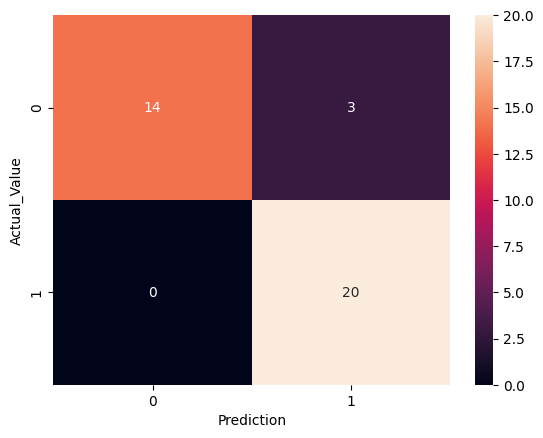

In [20]:
# Execute the CFM (Confusion Matrix)

df_cfm = pd.DataFrame(df_x_pred,columns=['Actual_Value','Prediction'])

cf_matrix=pd.crosstab(df_cfm['Actual_Value'], df_cfm['Prediction'], rownames=['Actual_Value'] , colnames=['Prediction'])

sns.heatmap(cf_matrix, annot=True)#, cmap='Blues')

6. Conclusion 

6.1.	Synopsis of Results 

We used the Support Vector Classifier (SVC) model to predict heart attacks. We got 37 predictions, 34 of them were accurate, yielding an accuracy rate of 91.89%. The model has a good predictive ratio.

6.2.	Problems and Their Fixes 

Assuring data quality, picking pertinent features, and deciding on the right model were the biggest challenges.

6.3.	Possible Upgrades 

Adding more features, adjusting hyperparameters, employing ensemble techniques, and growing the dataset size are a few possible enhancements. 

6.4.	Research in Medicine

The features used in the model, such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, and maximum heart rate, are well-established predictors of heart attacks according to medical research. Additionally, features like exercise-induced angina and resting electrocardiographic results are critical indicators of heart health.

Some references that stats that:

•	Heart Disease Prediction From Patient Data in R. (https://www.r-bloggers.com/2019/09/heart-disease-prediction-from-patient-data-in-r/)

•	Heart Disease Prediction Using Machine Learning. (https://www.jetir.org/papers/JETIR2402583.pdf)

•	Effective Machine Learning-Based Heart Disease Prediction Model. (https://link.springer.com/chapter/10.1007/978-981-99-6550-2_14)

•	itHub Repository: Heart Failure Prediction. (https://github.com/nileshely/Heart-Failure-Prediction)

•	Heart disease risk prediction using deep learning techniques. (https://link.springer.com/article/10.1007/s11042-023-14817-z)
